In [1]:
import pandas as pd

def load_some_data(path, separ = ','):
    return pd.read_csv(path, sep=separ, parse_dates = ['datetime'], index_col = 'datetime')

events_battle = load_some_data(r'data/events_battle.txt')
events_hero = load_some_data(r'data/events_hero.txt')
events_level = load_some_data(r'data/events_level.txt', '\t')
events_payment = pd.read_csv(r'data/events_payment.txt', parse_dates = ['created'], index_col = 'created')
events_quest = load_some_data(r'data/events_quest.txt')
events_resource = load_some_data(r'data/events_resource.txt')
events_user = load_some_data(r'data/events_user.txt')

In [233]:
#объявление всех сетов битв для анализа
no_bot = events_battle.loc[events_battle['opponent_type'] != 'bot']
duel = events_battle.loc[events_battle['kind'] =='duel']
only_bot = events_battle.loc[events_battle['opponent_type'] == 'bot']
duels_with_bots = events_battle.loc[(events_battle['opponent_type'] == 'bot') & (events_battle['kind'] =='duel')] #zero
duels_with_supers = duels_with_bots = events_battle.loc[(events_battle['opponent_race_id'] == 'super-hero') & (events_battle['kind'] =='duel')]#zero
donaters = events_payment.loc[(events_payment['reason'] == 'payment')] #донатеры
#набор с челиками, которые создали одного перса - ниже

In [228]:
import numpy as np
def add_bool_col(df,label, users):
    tdf = df
    tdf = tdf.groupby('user_id').agg('count')
    tdf[label] = 1
    users[label] = tdf[label]
    users[label] = users[label].fillna(0)


In [41]:
counted_races = events_hero.groupby('user_id').agg('count').sort_values(by = 'race') #рас от 1 до 4, лол
#events_hero.loc[events_hero['race'] == 'super-hero'] # супергерой есть у каждого
def_users = events_user[~events_user.set_index('user_id').index.isin(counted_races.loc[counted_races['id'] > 1].index)]
def_users # пользователи только на суперменах
starter_battles = events_battle[events_battle.set_index('user_id').index.isin(def_users.set_index('user_id').index)]

In [119]:
def get_players_winrates(df):
    win = df.loc[df['status'] == 'win'][['user_id','status']].groupby('user_id').agg('count')
    tot = df[['user_id','status']].groupby('user_id').agg('count')
    return (win/tot).fillna(0)
def get_players_games(df):
    tot = df[['user_id','status']].groupby('user_id').agg('count')
    return tot.fillna(0)

In [214]:
def get_labels():
    used_cols = ['user_id']
    all_dates = events_battle[used_cols]
    all_dates = all_dates.append(events_resource[used_cols])
    all_dates = all_dates.append(events_quest[used_cols])
    all_dates = all_dates.append(events_payment[used_cols])
    last_dates = all_dates.reset_index().set_index(['user_id']).groupby(['user_id']).agg('max')
    last_dates.rename(index=str, columns={"index": "datetime"}, inplace = True)
    def is_leaved(date):
        current_date = pd.Timestamp(2018, 11, 8, 12)
        if (current_date - date).days > 3:
            return 1
        else:
            return 0
    last_dates['leaved'] = last_dates.apply(lambda dat : is_leaved(dat['datetime']),axis = 1)
    last_dates=last_dates[['leaved']]
    return last_dates

In [146]:
def get_quest_count():
    quest_count = events_battle[['user_id','id']].groupby('user_id').agg('count')
    quest_count['completed_quests'] = quest_count['id']
    quest_count = quest_count[['completed_quests']]
    return quest_count

,completed_quests
user_id,
00040422-b869-4272-ba05-1cc9481037c9,3
001a3472-44bc-4583-95d9-bf8759085017,86
002bcd7d-83b1-42ac-b257-ed71a4585f5e,125
0030c0b3-9683-41c0-bcac-b2aad03759f4,34
003c3099-4382-4f86-a989-a847628894f0,8
00467ba2-b71c-4a69-b8bc-d7491cf2eca0,3
0047e219-202a-4eda-8d31-b35a58f50eec,96
0049abe6-cc01-4c40-add7-ea480abcb0c4,3
0049d114-1c4f-4d9e-afce-bf2bc533eb80,4


In [163]:
# Среднее изменение количества ресурса в день
def get_average_resource_change(resource_name):
    changes = events_resource.loc[events_resource['res_id'] == resource_name]
    changes = changes.groupby(['user_id', changes.index.date]).agg('sum')[['total']]
    changes = changes.groupby('user_id').agg('mean')
    return changes

In [209]:
def get_most_race(ds):
    cur_race = pd.merge(ds, events_hero, on = 'hero_id')
    return cur_race.groupby("user_id_x")['race'].agg(lambda x: pd.Series.mode(x)[0]).to_frame()



In [237]:
users = events_user[['user_id']]
users = users.set_index('user_id')
add_bool_col(duel, 'is_pvp', users)
add_bool_col(def_users, 'newbie', users)
add_bool_col(donaters, 'donator', users)
users['pvp_efficiency'] = get_players_winrates(duel)['status'] * get_players_games(duel)['status']
users['pve_effifiency']  =get_players_winrates(only_bot)['status'] * get_players_games(only_bot)['status']
users['quest_completed'] = get_quest_count()['completed_quests']
users['gold_mean_changes'] = get_average_resource_change('gold')['total']
users['luck_mean_changes'] = get_average_resource_change('luck')['total']
users['fauvorite_battle_race'] = get_most_race(events_battle)['race']
users['fauvorite_quest_race'] = get_most_race(events_quest)['race']
users['leaved'] = get_labels()['leaved']
users['leaved'] = users[['leaved']].fillna(1)
labels = users[['leaved']]
users = users.drop(columns=['leaved'])
users = users.fillna(0)
users['fauvorite_battle_race'] = pd.Categorical(users['fauvorite_battle_race']).codes
users['fauvorite_quest_race'] = pd.Categorical(users['fauvorite_quest_race']).codes

In [238]:
users

,is_pvp,newbie,donator,pvp_efficiency,pve_effifiency,quest_completed,gold_mean_changes,luck_mean_changes,fauvorite_battle_race,fauvorite_quest_race
user_id,,,,,,,,,,
de8b8cff-8ff2-4737-8421-5cfb6e6d858d,0.0,0.0,0.0,0.0,11.0,12.0,6066.000000,0.0,3,3
1a674288-28d0-495b-8c21-8c54f06088f6,1.0,0.0,0.0,2.0,29.0,32.0,8673.666667,0.0,1,1
33b8bddf-a67d-4ceb-a63d-0b077c711c96,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0,0
f6bfd30b-dbd2-498c-b222-257936cd01f3,0.0,0.0,0.0,0.0,2.0,3.0,2500.000000,0.0,4,4
40f0153b-2b89-4e92-91b1-9b3eead3fe62,1.0,0.0,0.0,1.0,63.0,66.0,22046.000000,0.0,2,2
8a11715b-1a38-4d99-ad95-398c5ad901b6,0.0,0.0,0.0,0.0,40.0,43.0,8638.500000,0.0,3,3
6ba29460-de15-4629-b2fb-90a2db426da0,0.0,0.0,0.0,0.0,2.0,3.0,2260.000000,0.0,4,4
93af6cff-12d6-4f7f-9be0-a819379f3161,1.0,0.0,0.0,0.0,34.0,36.0,31984.000000,0.0,2,2
f3b97ed2-47f7-49b9-9068-59a08ade3170,1.0,0.0,0.0,1.0,22.0,25.0,4053.333333,0.0,2,2


In [250]:
from sklearn.tree import export_graphviz
from IPython import display
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=1, max_depth=10,  random_state=0)
clf = clf.fit(users, labels['leaved'])
str_tree = Source(export_graphviz(clf.estimators_[0], 
   out_file=None, 
   filled=True,        
   special_characters=True, 
   feature_names = list(users.columns),
   class_names = ['good boi', 'leaver'],                        
   rotate=True))

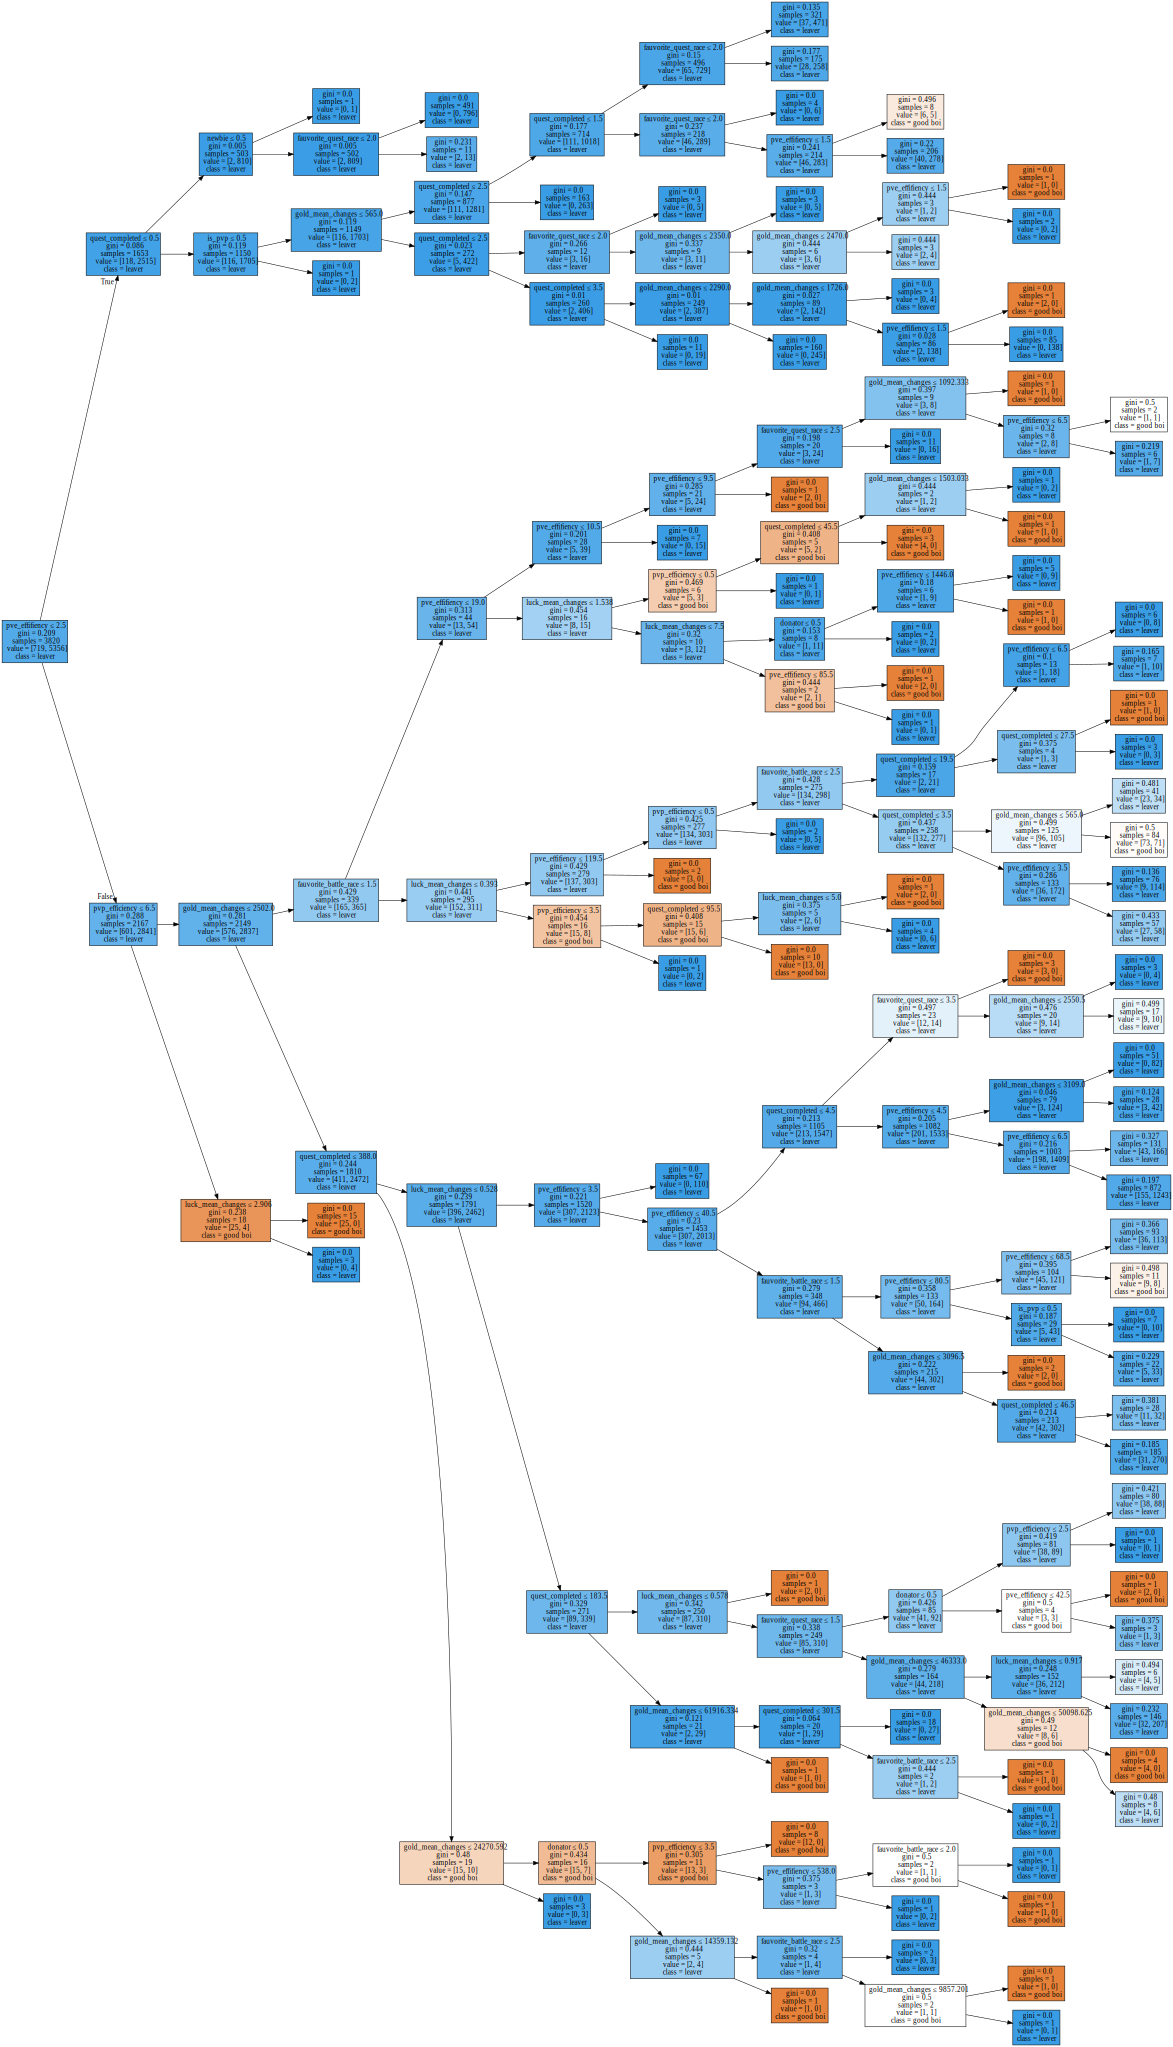

In [251]:
from graphviz import Source 
from IPython.display import SVG 
from sklearn import tree 
# extra step to allow graphviz to be found 
import os
sergey_notebook_path = r'D:\anaconda\envs\foo\Library\bin\graphviz'
sergey_desktop_path = r'F:\Anaconda\envs\foo\Library\bin\graphviz'
os.environ["PATH"] += os.pathsep + sergey_notebook_path
SVG(str_tree.pipe(format='svg'))